# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [4]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "../Resources/city_data.csv"
ride_data_to_load = "../Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [7]:
#  1. Get the total rides for each city type
# use the groupby() function to create a Series of data that has the type of city as the index
# then apply the count() method to the "ride_id" column.
total_ride_count_df = pyber_data_df.groupby(["type"]).count()[["ride_id"]]
#convert to df
##total_ride_count_df=total_ride_count.to_frame()
#rename column
total_ride_count_df.columns=["Total Rides"]
total_ride_count_df


,Total Rides
type,
Rural,125
Suburban,625
Urban,1625


In [9]:
# 2. Get the total drivers for each city type
# use the groupby() function to create a Series of data that has the type of city as the index
# then apply the sum() method to the "driver_count" column.
#total_driver_count_df= pyber_data_df.groupby(["type"]).sum()["driver_count"]
#merged df driver counts are duplicated on many rows. Used city_data_df to get total drivers...remove duplicates in merged file?
total_driver_count_df= city_data_df.groupby(["type"]).sum()[["driver_count"]]
#convert to df
#total_driver_count_df=total_driver_count.to_frame()
#rename column
total_driver_count_df.columns=["Total Drivers"]
total_driver_count_df



,Total Drivers
type,
Rural,78
Suburban,490
Urban,2405


In [11]:
#  3. Get the total amount of fares for each city type
# use the groupby() function to create a Series of data that has the type of city as the index
# then apply the sum() method to the "fare" column.
total_fares_df = pyber_data_df.groupby(["type"]).sum()[["fare"]]
#convert to df
#total_fares_df=total_fares.to_frame()
#rename column
total_fares_df.columns=["Total Fares"]
total_fares_df


,Total Fares
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [41]:
#  4. Get the average fare per ride for each city type.
# calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
average_fare_per_ride= total_fares_df["Total Fares"]/total_ride_count_df["Total Rides"]
#convert series to df to used merge function
average_fare_per_ride_df=average_fare_per_ride.to_frame()
#rename column
average_fare_per_ride_df.columns=["Average Fare per Ride"]
average_fare_per_ride_df



,Average Fare per Ride
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [44]:
# 5. Get the average fare per driver for each city type. 
# calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
average_fare_per_driver = total_fares_df["Total Fares"]/total_driver_count_df["Total Drivers"]
#convert series to df to used merge function
average_fare_per_driver_df=average_fare_per_driver.to_frame()
#rename column
average_fare_per_driver_df.columns=["Average Fare per Driver"]
average_fare_per_driver_df

,Average Fare per Driver
type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [45]:
#  6. Create a PyBer summary DataFrame. 
# create a PyBer summary DataFrame with all the data gathered

pyber_summary_df=pd.merge(pd.merge(pd.merge(pd.merge(total_ride_count_df, total_driver_count_df, on= 'type'),total_fares_df,on= 'type'),average_fare_per_ride_df,on="type"),average_fare_per_driver_df,on='type')
         
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [46]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [47]:
#  8. Format the columns.
# format the columns of the Pyber summary DataFrame
format_mapping = {"Total Rides": "{:,}",
                  "Total Drivers": "{:,}",
                  "Total Fares": "${:,.2f}",
                  "Average Fare per Ride": "${:,.2f}",
                  "Average Fare per Driver":"${:,.2f}"}
pyber_summary_df.style.format(format_mapping)


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [48]:
# 1. Read the merged DataFrame

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [49]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

#Create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of the pyber_data_df
#DataFrame, then apply the sum() method on the "fare" column to show the total fare amount for each date.
fare_each_date_df = pyber_data_df.groupby(["type","date"]).sum("fare")
fare_each_date_df.tail(10)


fare        ride_id  driver_count
type  date                                                   
Urban 2019-05-07 17:27:48   6.39  7608007126056            41
      2019-05-07 20:05:15  24.20  3915678713657             6
      2019-05-07 20:22:19  18.74  6395645209944            39
      2019-05-08 01:54:18  32.69  1643407853276            25
      2019-05-08 02:31:25  41.33  5688921852912             4
      2019-05-08 04:20:00  21.99   117997692054            52
      2019-05-08 04:39:49  18.45  1811574736337            11
      2019-05-08 07:29:01  18.55  5682021476085            33
      2019-05-08 11:38:35  19.77  7837163332630             4
      2019-05-08 13:10:18  18.04  5616262558026            58

In [50]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_each_date_df = fare_each_date_df.reset_index()


In [51]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

#use the pivot() function to convert the DataFrame from the previous step so that the index is the "date,"
#each column is a city "type," and the values are the "fare."
#each cell has the total fare for the date and time
#The pivot() function will return a reshaped DataFrame that is organized by given index and column values.

fare_each_date_df_pivot=fare_each_date_df.pivot(index="date",columns="type",values="fare")

fare_each_date_df_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [52]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#create a new DataFrame by using the loc method 
#corrected end date to 4-28 to match challenge instructions
fare_date_range_pivot_df=fare_each_date_df_pivot.loc['2019-01-01':'2019-04-28']

fare_date_range_pivot_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28
2019-04-27 23:26:03,NaN,NaN,19.06
2019-04-27 23:52:44,NaN,45.98,NaN


In [53]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_date_range_pivot_df.index = pd.to_datetime(fare_date_range_pivot_df.index)

In [54]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_date_range_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [55]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 5.
#Resample the data in weekly bins, then apply the sum() method to get the total fares for each week.
fare_date_range_pivot_resample_df=fare_date_range_pivot_df.resample("W").sum()
fare_date_range_pivot_resample_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


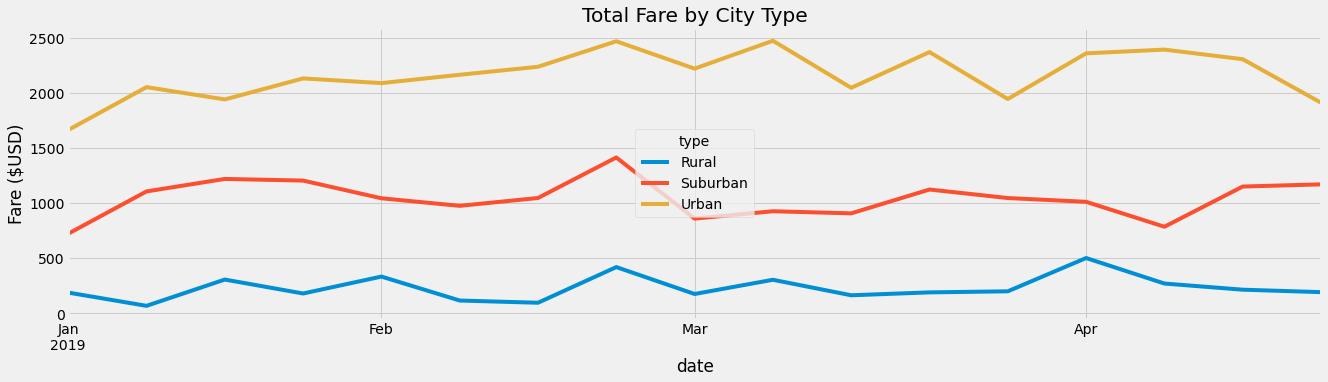

In [75]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#graph the resampled DataFrame from Step 7 using the object-oriented interface method and the df.plot() method,
#as well as the Matplotlib "fivethirtyeight" graph style code snippet provided in the starter code. 
#Annotate the y-axis label and the title, then use the appropriate code to save the figure as PyBer_fare_summary.png 
#in your "analysis" folder.

#Pyplot vs. Object-Oriented interface. When using matplotlib we have two approaches:
#pyplot interface / functional interface.
#Object-Oriented interface (OO).
#Pyplot interface provided a MATLAB-like interface for making plots; import matplotlib.pyplot as plt---> plt.plot() and other plt.xxxx functions (Matlab method)
#Pandas uses the plot() method to create diagrams. Pyplot, a submodule of the Matplotlib library is used to visualize the diagram on the screen.

#df.plot() method
fare_date_range_pivot_resample_df.plot(title='Total Fare by City Type', ylabel='Fare ($USD)',figsize=(20,5))
plt.savefig("../analysis/PyBer_fare_summary.png")







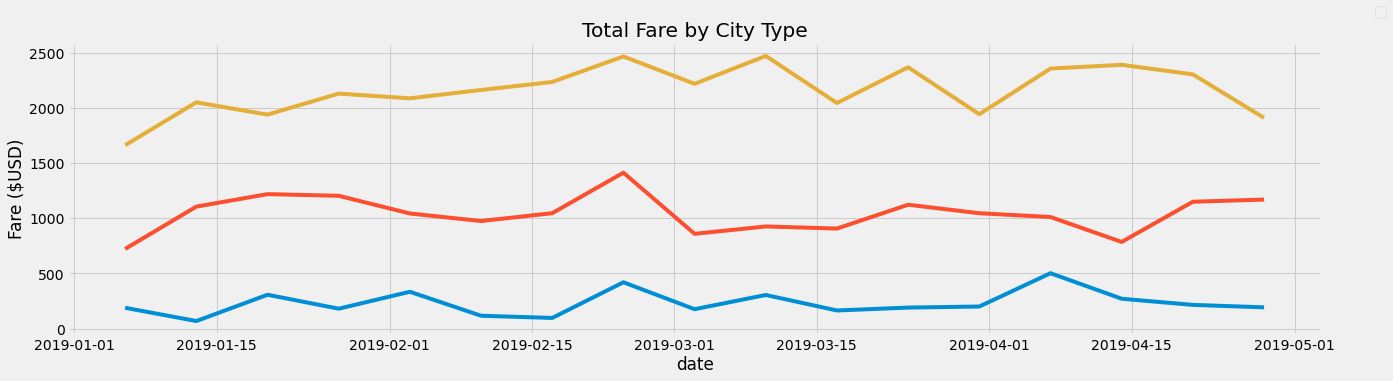

<Figure size 432x288 with 0 Axes>

In [76]:
#object-oriented interface


fig, ax = plt.subplots()


ax.set_title("Total Fare by City Type")
ax.xaxis.grid(True)
ax.yaxis.grid(True)
fig.set_size_inches(20,5)
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('date')
fig.legend('type')
#ax.plot(x_axis, y_axis)
ax.plot(fare_date_range_pivot_resample_df)
plt.show()
plt.savefig("../analysis/PyBer_fare_summary2.png")